# Blueberry Yield Prediction Kagge Competition
Kaggle playground series 3, episode 14

In [237]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load and investigate data

In [238]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [239]:
# Quick information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [240]:
# Look at the shape of the data
train_df.shape, test_df.shape

((15289, 18), (10194, 17))

In [241]:
# Check for any null values
train_df.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

## Exploratory data analysis

<AxesSubplot: >

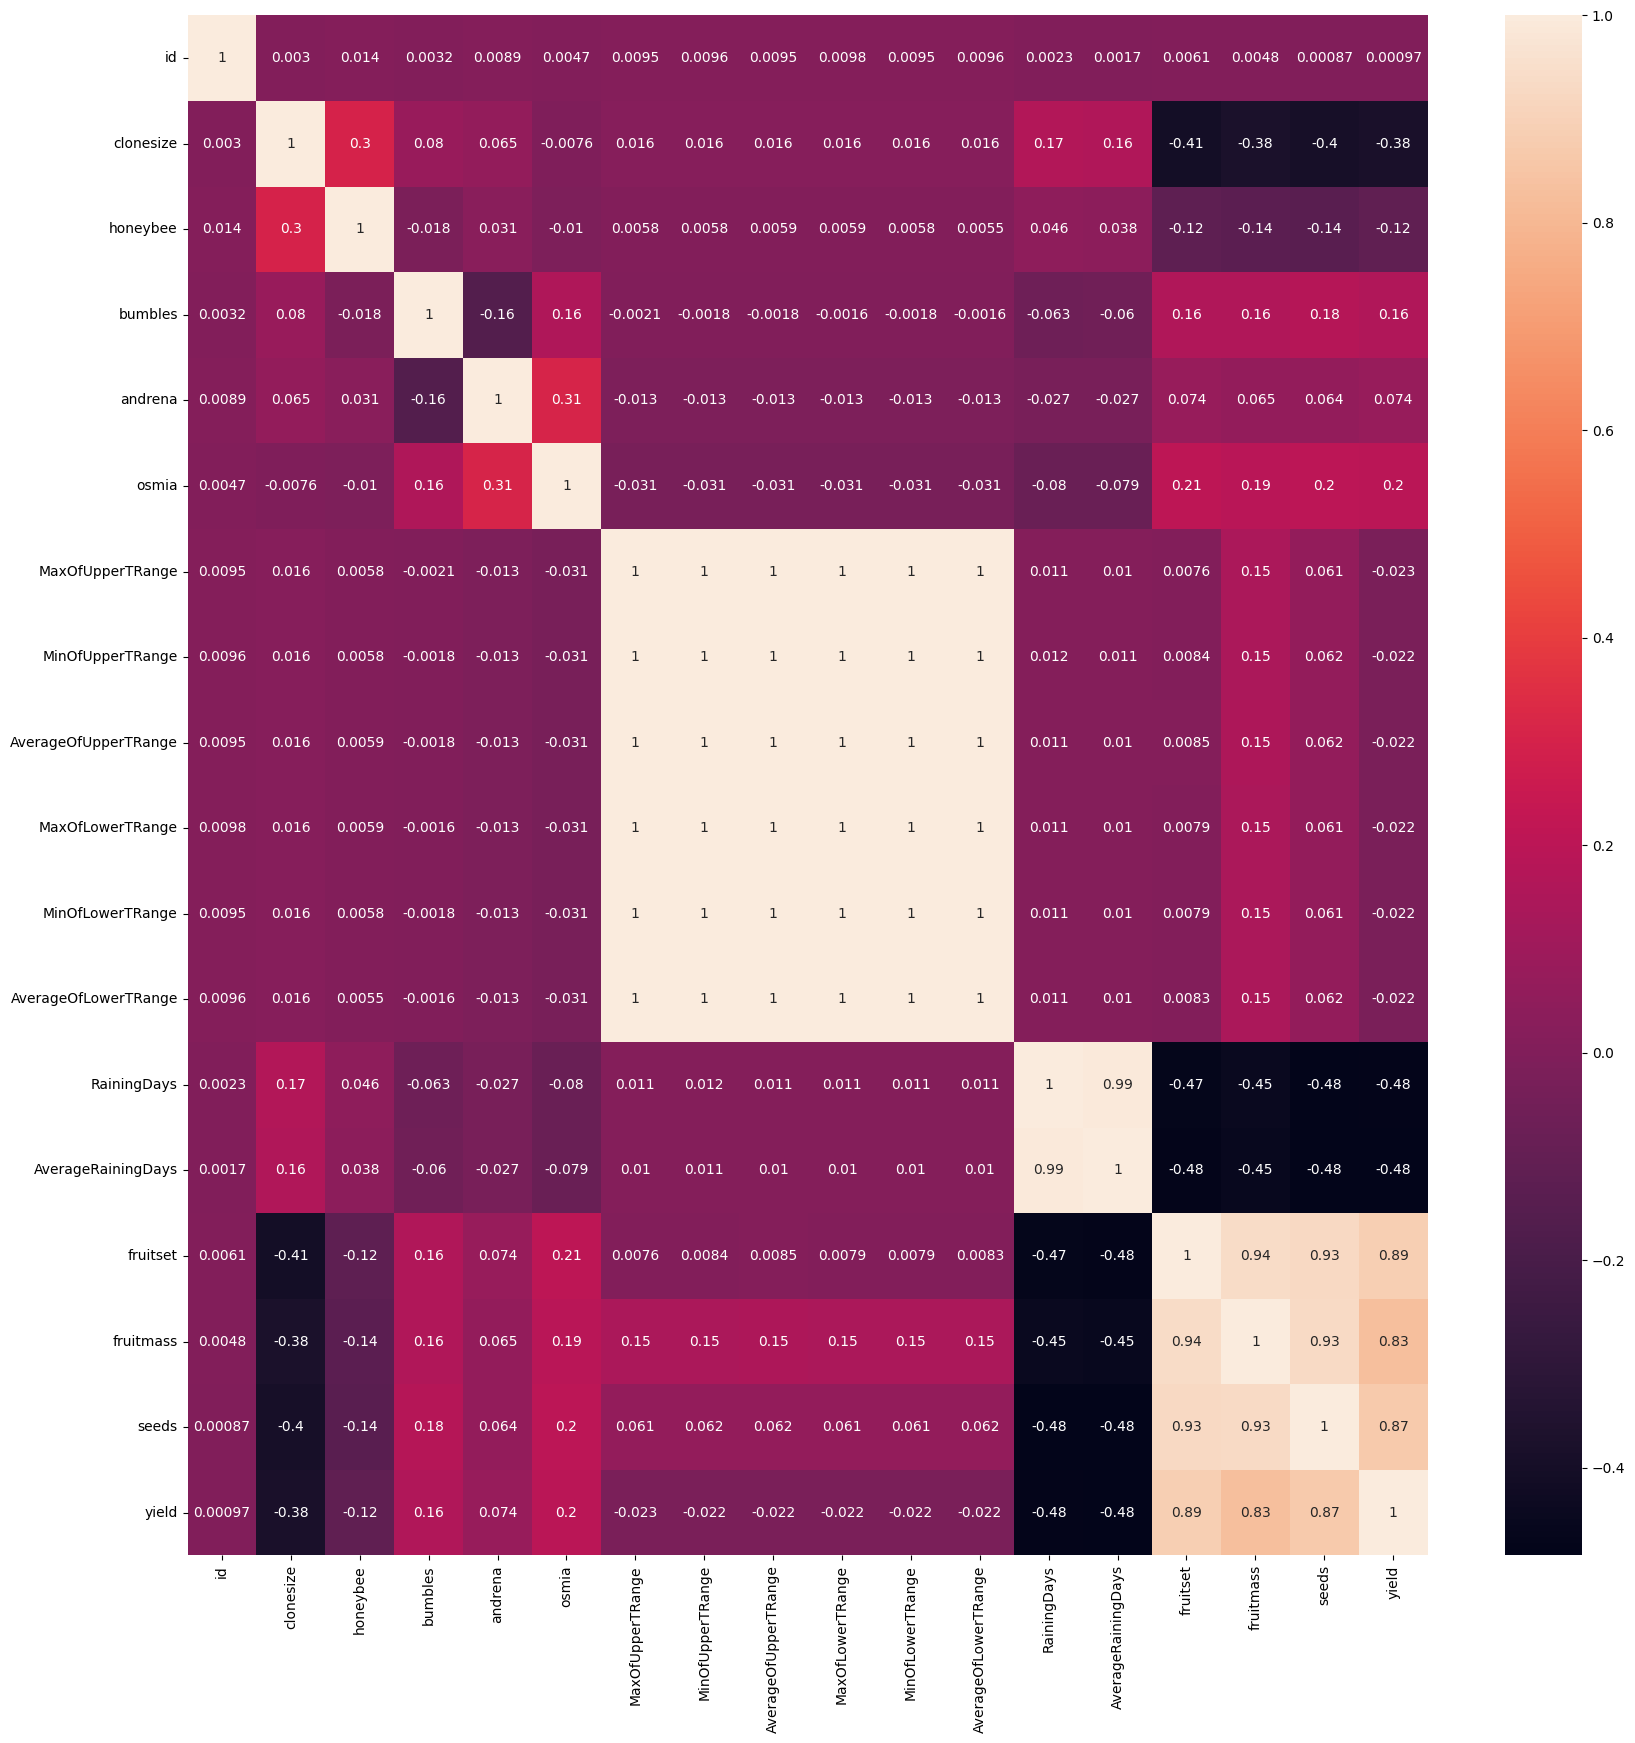

In [242]:
# Correlation heat map
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True, ax=ax)

In [243]:
# Heatmap showed a series of perfectly correlate features, so we just keep one
train_df = train_df.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays', 'id'],axis=1)
test_df = test_df.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays', 'id'],axis=1)

In [244]:
# Get an understanding of the diffferent values for each variable
train_df.nunique(axis=0)


clonesize              6
honeybee               7
bumbles               11
andrena               16
osmia                 14
MaxOfUpperTRange       6
RainingDays            6
fruitset            1526
fruitmass           1515
seeds               2066
yield                776
dtype: int64

In [245]:
# Look at summary statistics
train_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,18.660865,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,11.657582,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,1.000000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,16.000000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,16.000000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,24.000000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,34.000000,0.652144,0.535660,46.585105,8969.401840


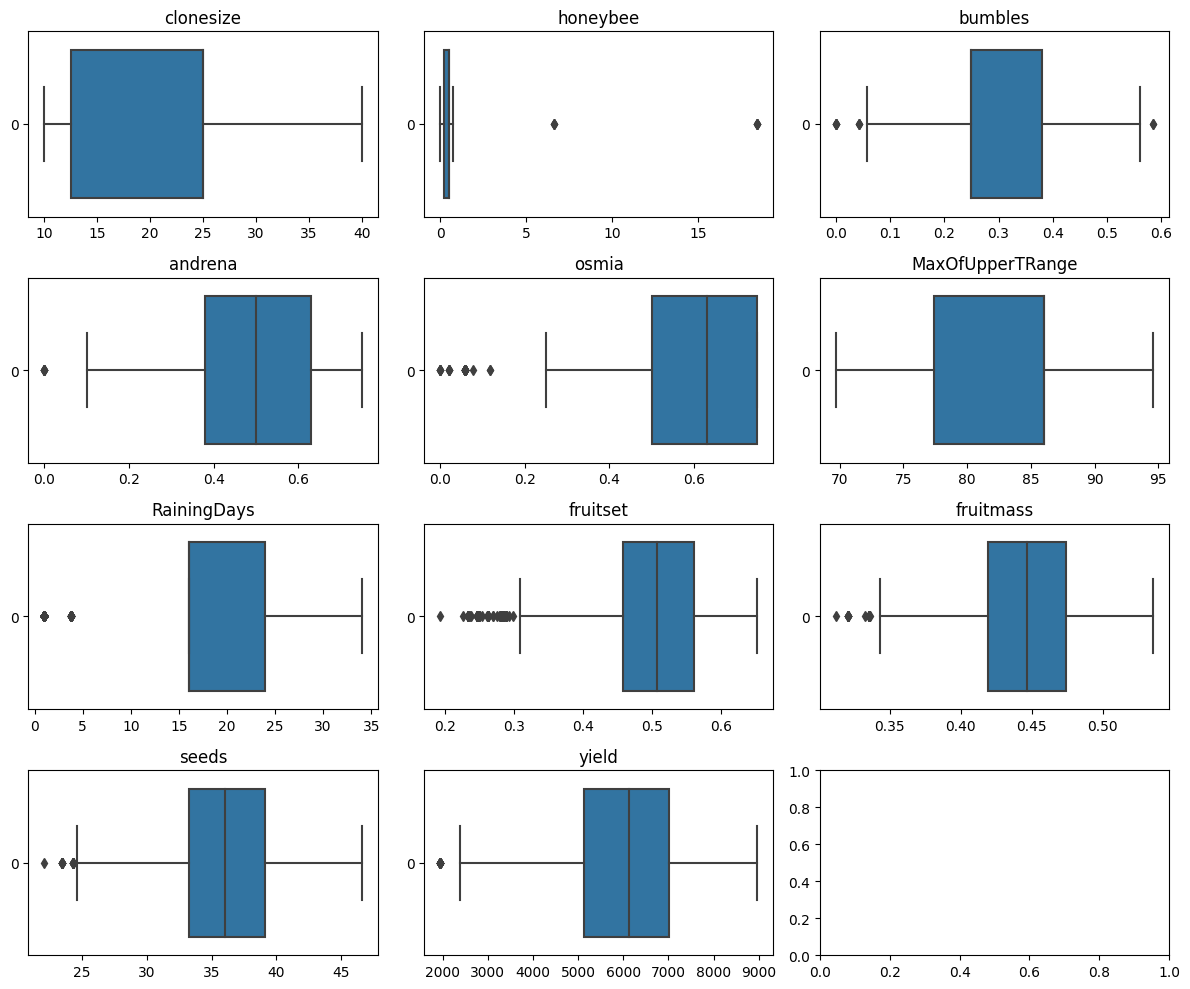

In [246]:
# Identify outliers
fig, axs = plt.subplots(4,3,figsize=(12,10))
for i, col in enumerate(train_df.columns):
    axs[i // 3, i % 3].set_title(col)
    sns.boxplot(data=train_df[col], ax=axs[i // 3, i % 3], orient='h')

plt.tight_layout()
plt.show()


In [248]:
# Remove the outliers
import numpy as np

def remove_outliers(df, columns, threshold=1.5):
    """
    Remove outliers from the specified columns in a DataFrame using the boxplot definition.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to remove outliers from.
        threshold (float): The threshold to determine outliers based on the IQR. Default is 1.5.
        
    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

train_df = remove_outliers(train_df, train_df.columns)

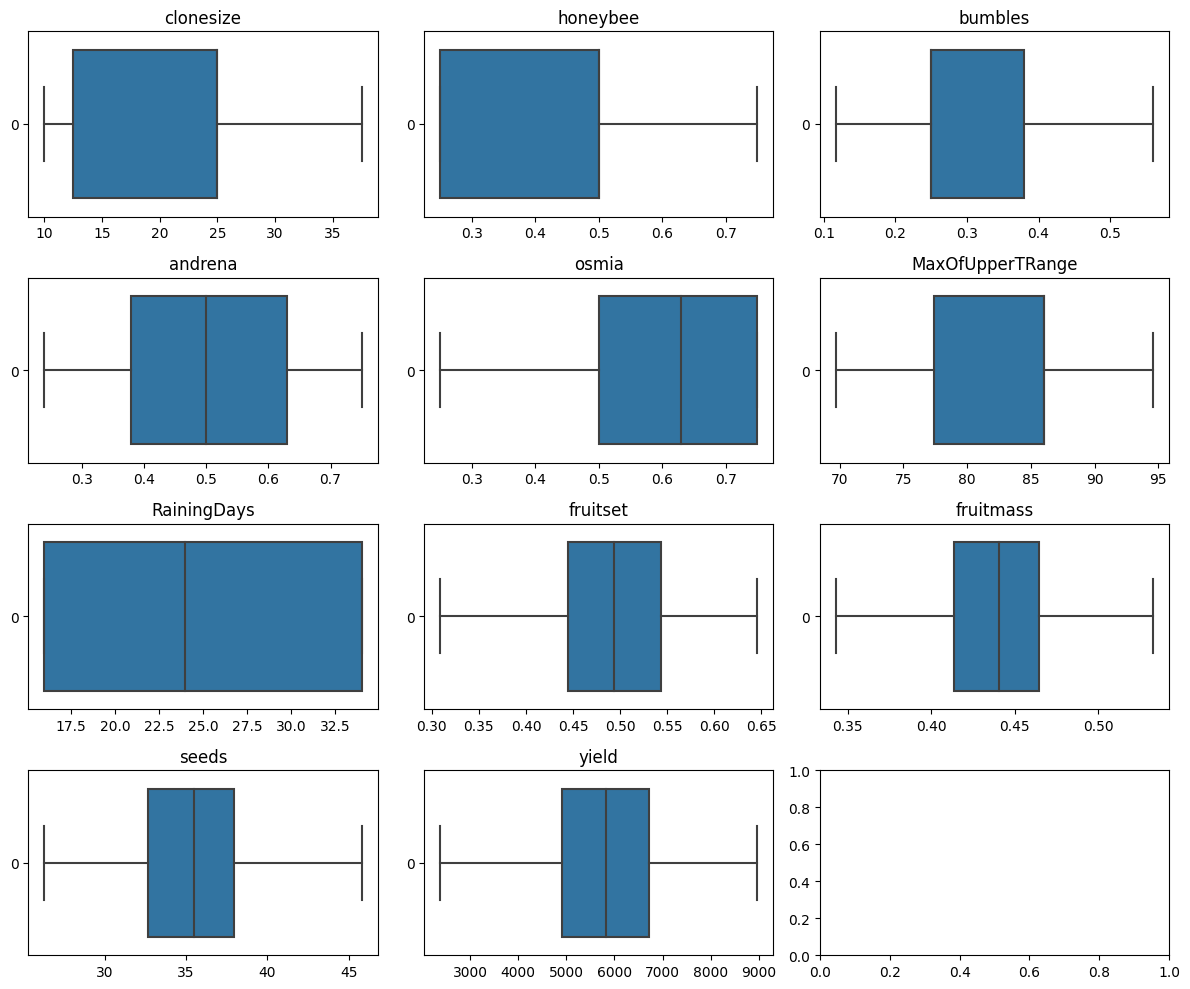

In [249]:
# Check outliers have been removed
fig, axs = plt.subplots(4,3,figsize=(12,10))
for i, col in enumerate(train_df.columns):
    axs[i // 3, i % 3].set_title(col)
    sns.boxplot(data=train_df[col], ax=axs[i // 3, i % 3], orient='h')

plt.tight_layout()
plt.show()


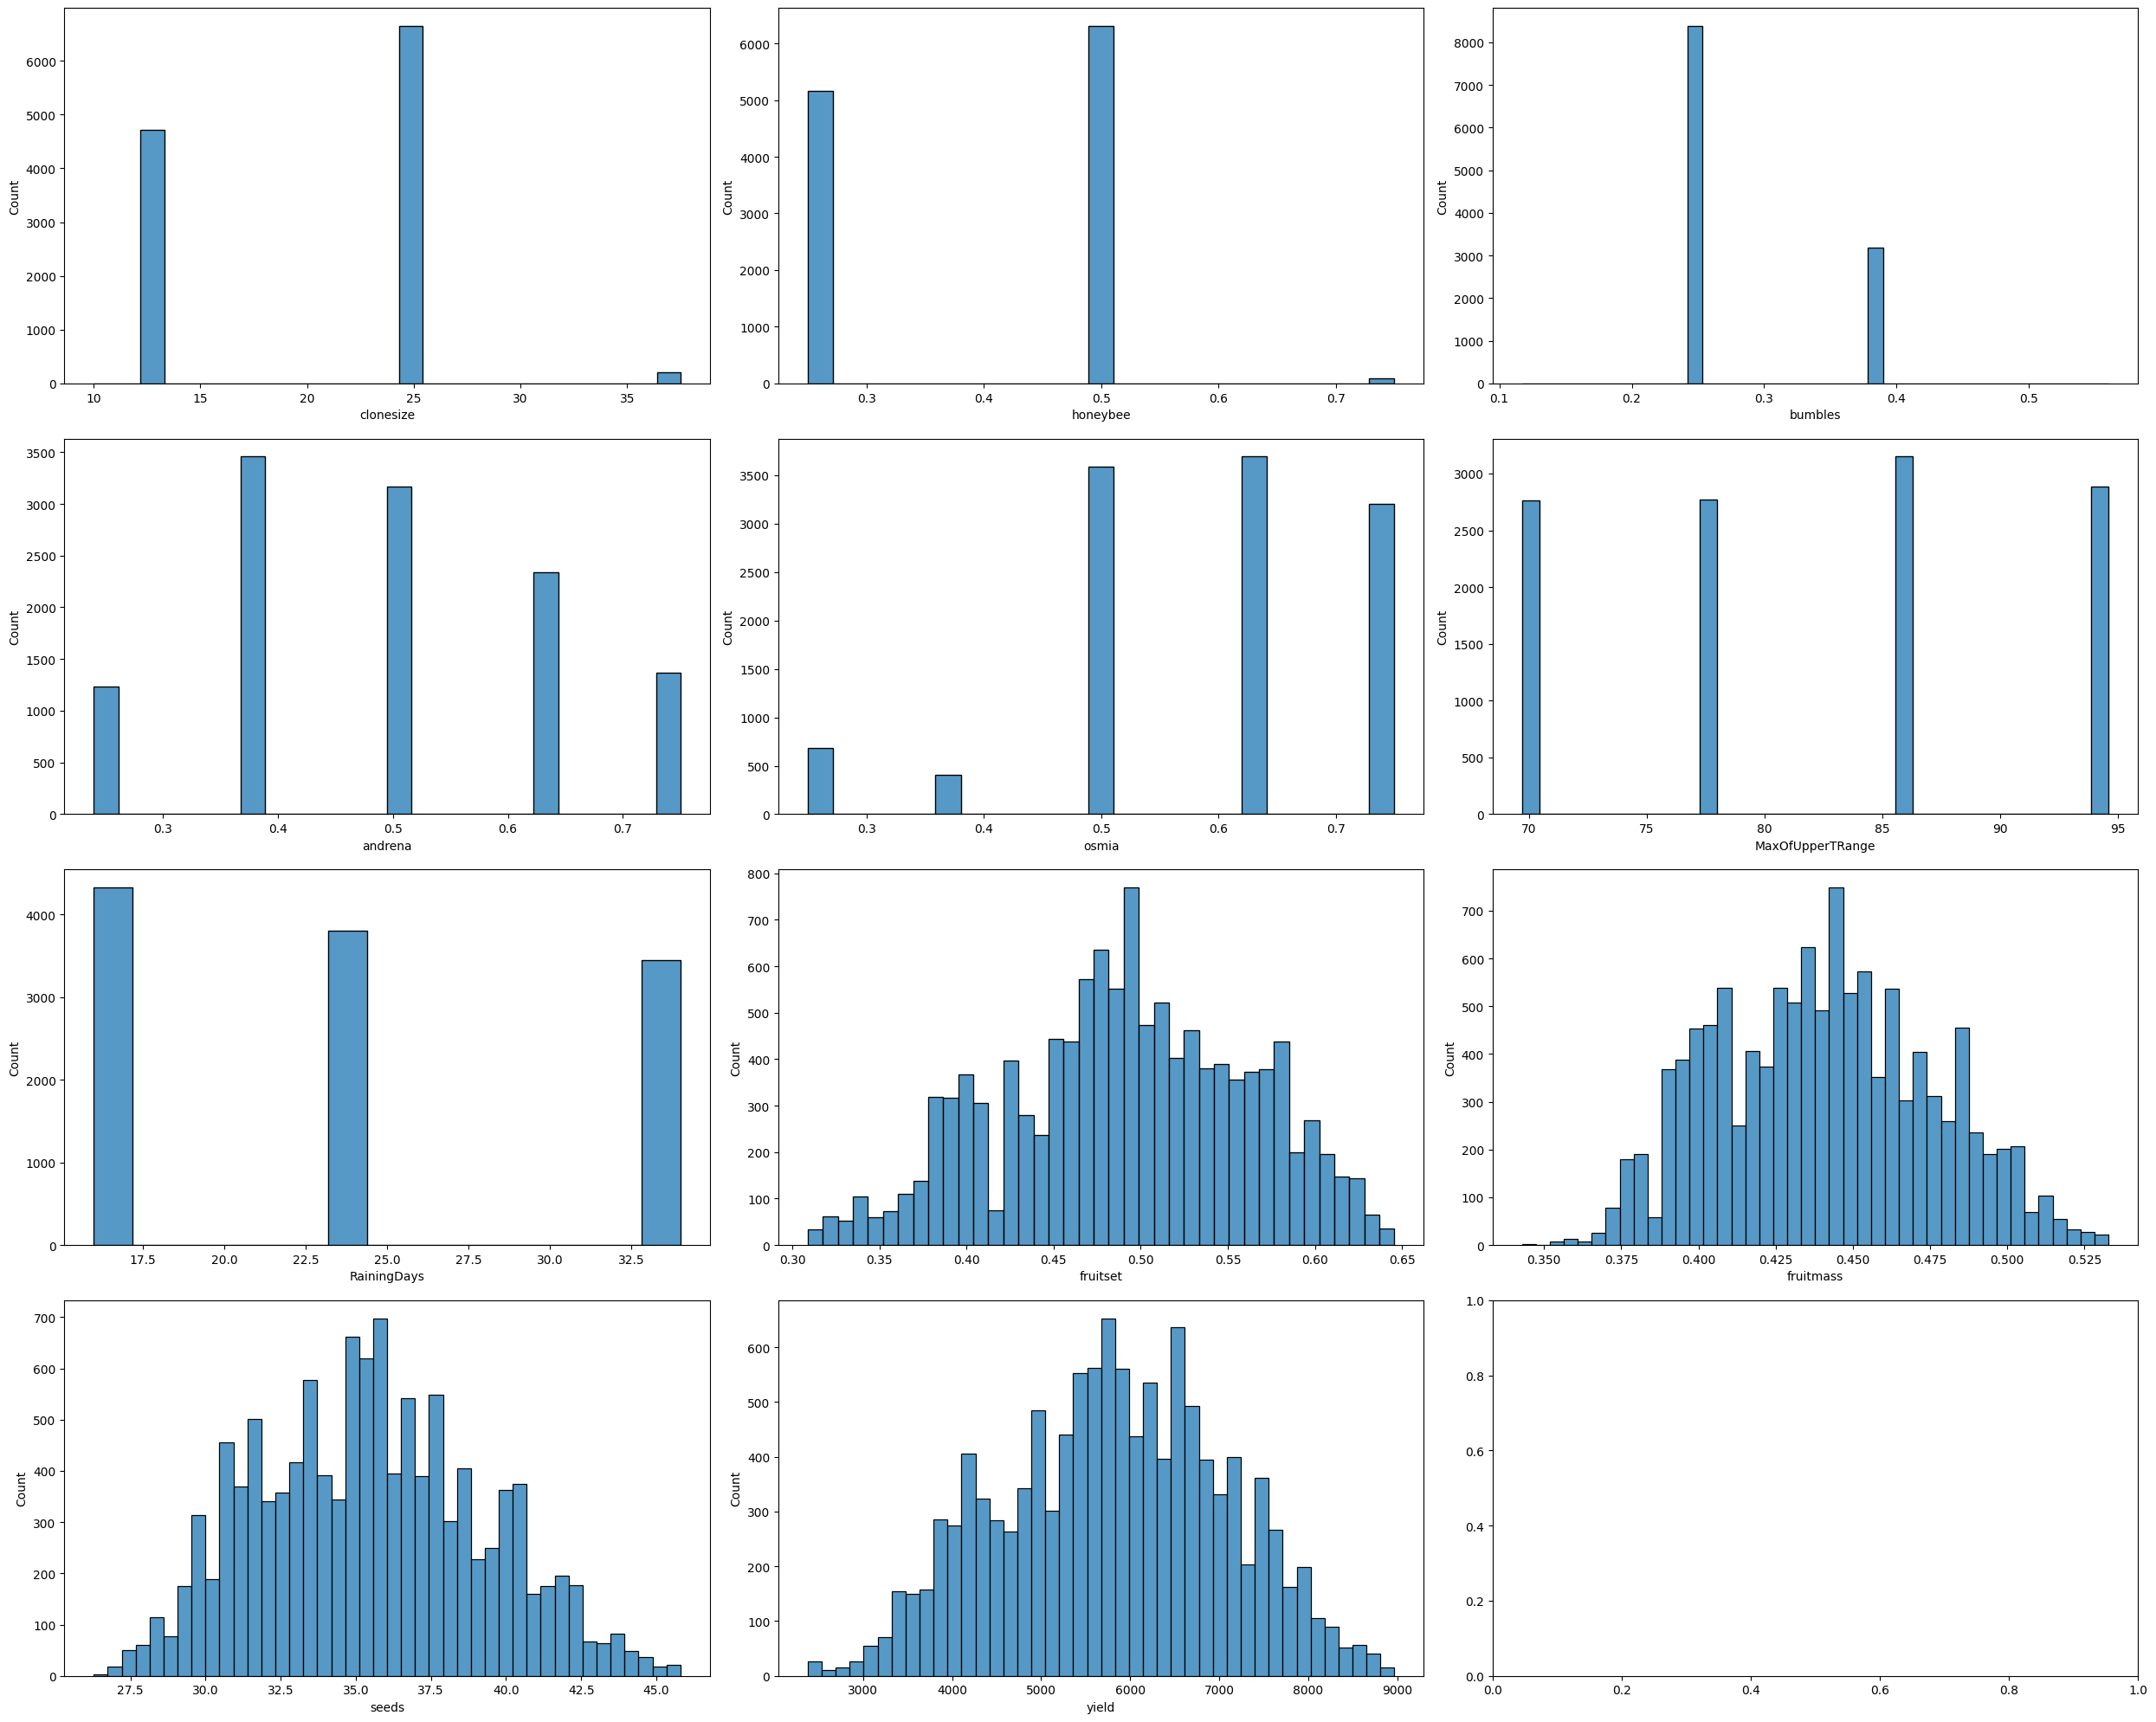

In [250]:
# Look at the univariate distributions
fig, axs = plt.subplots(4,3,figsize=(25,20))
for i, col in enumerate(train_df.columns):
    sns.histplot(data=train_df[col], ax=axs[i // 3, i % 3])

plt.tight_layout()
plt.show()


In [251]:
# Check if the number of categories has changed
train_df.nunique(axis=0)

clonesize              5
honeybee               4
bumbles                4
andrena                9
osmia                  7
MaxOfUpperTRange       6
RainingDays            4
fruitset            1366
fruitmass           1338
seeds               1745
yield                775
dtype: int64

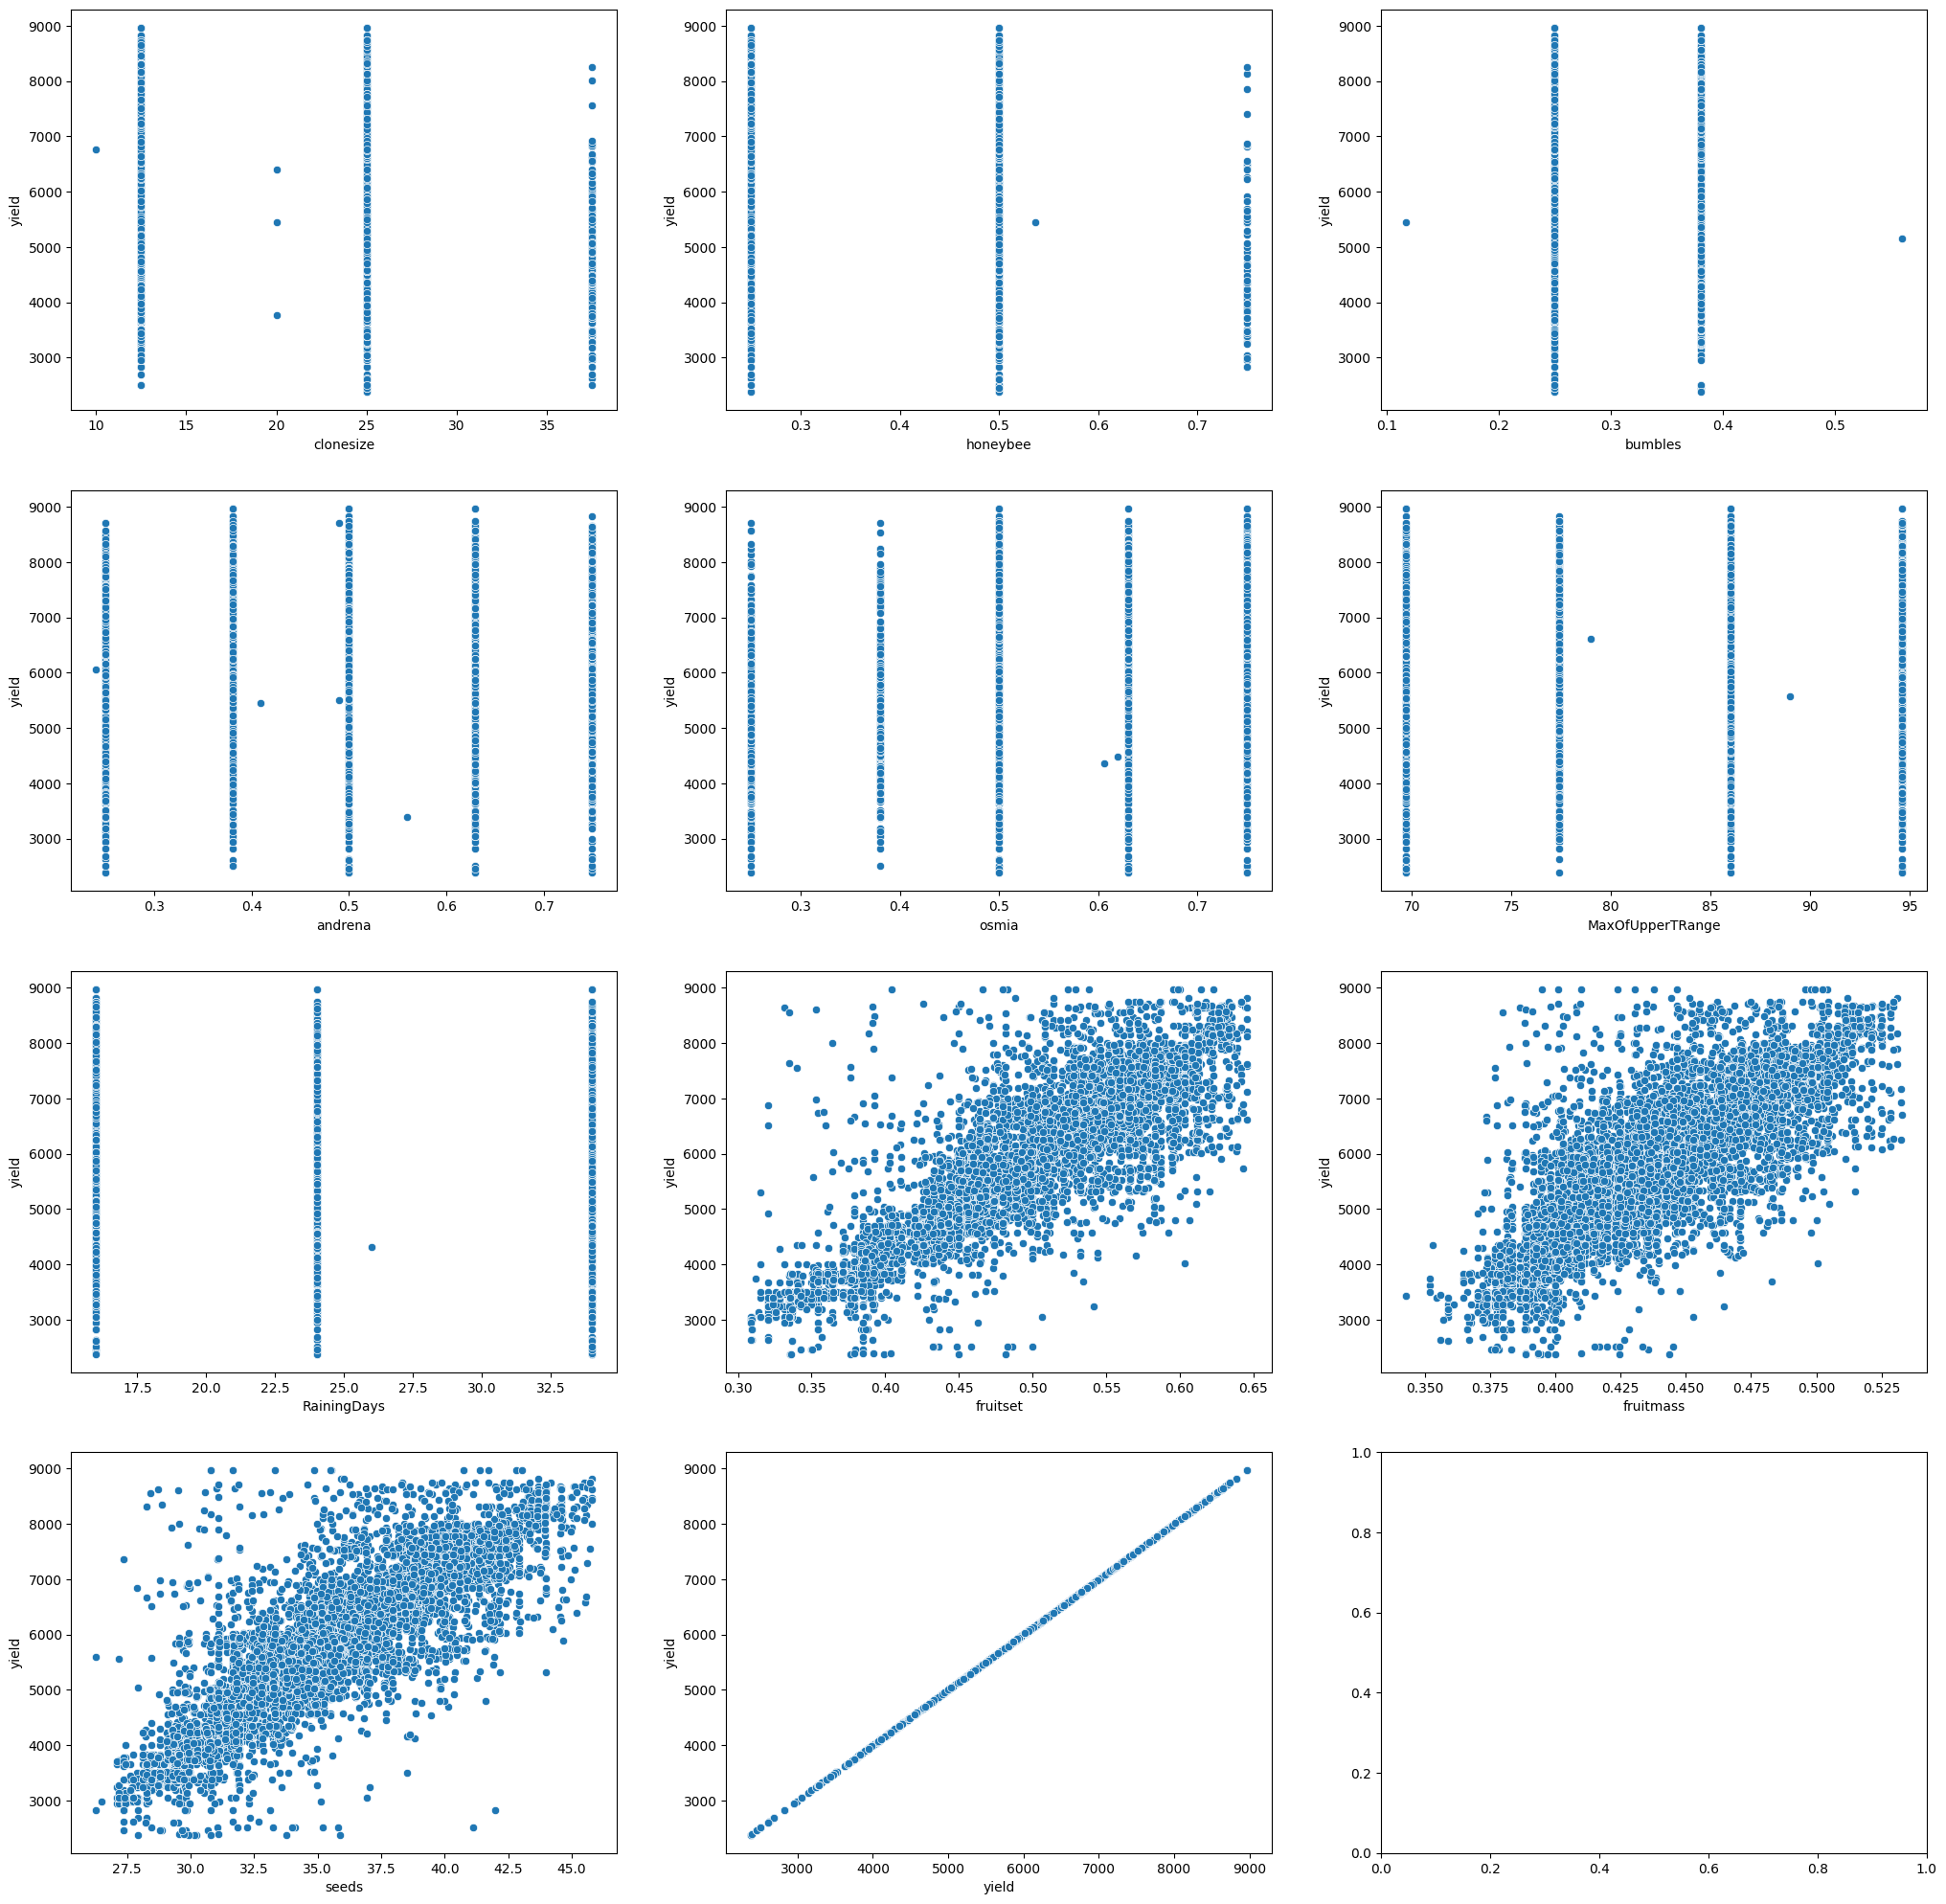

In [167]:
# Scatterplots of features with yield
# It is evident that many of the numerical features have distinct categories
# As a result, we should think about binning the values

fig, axs = plt.subplots(4, 3, figsize=(25,25))
for i, col in enumerate(train_df.columns):
    sns.scatterplot(data=train_df, x=col, y='yield', ax=axs[i // 3, i % 3])



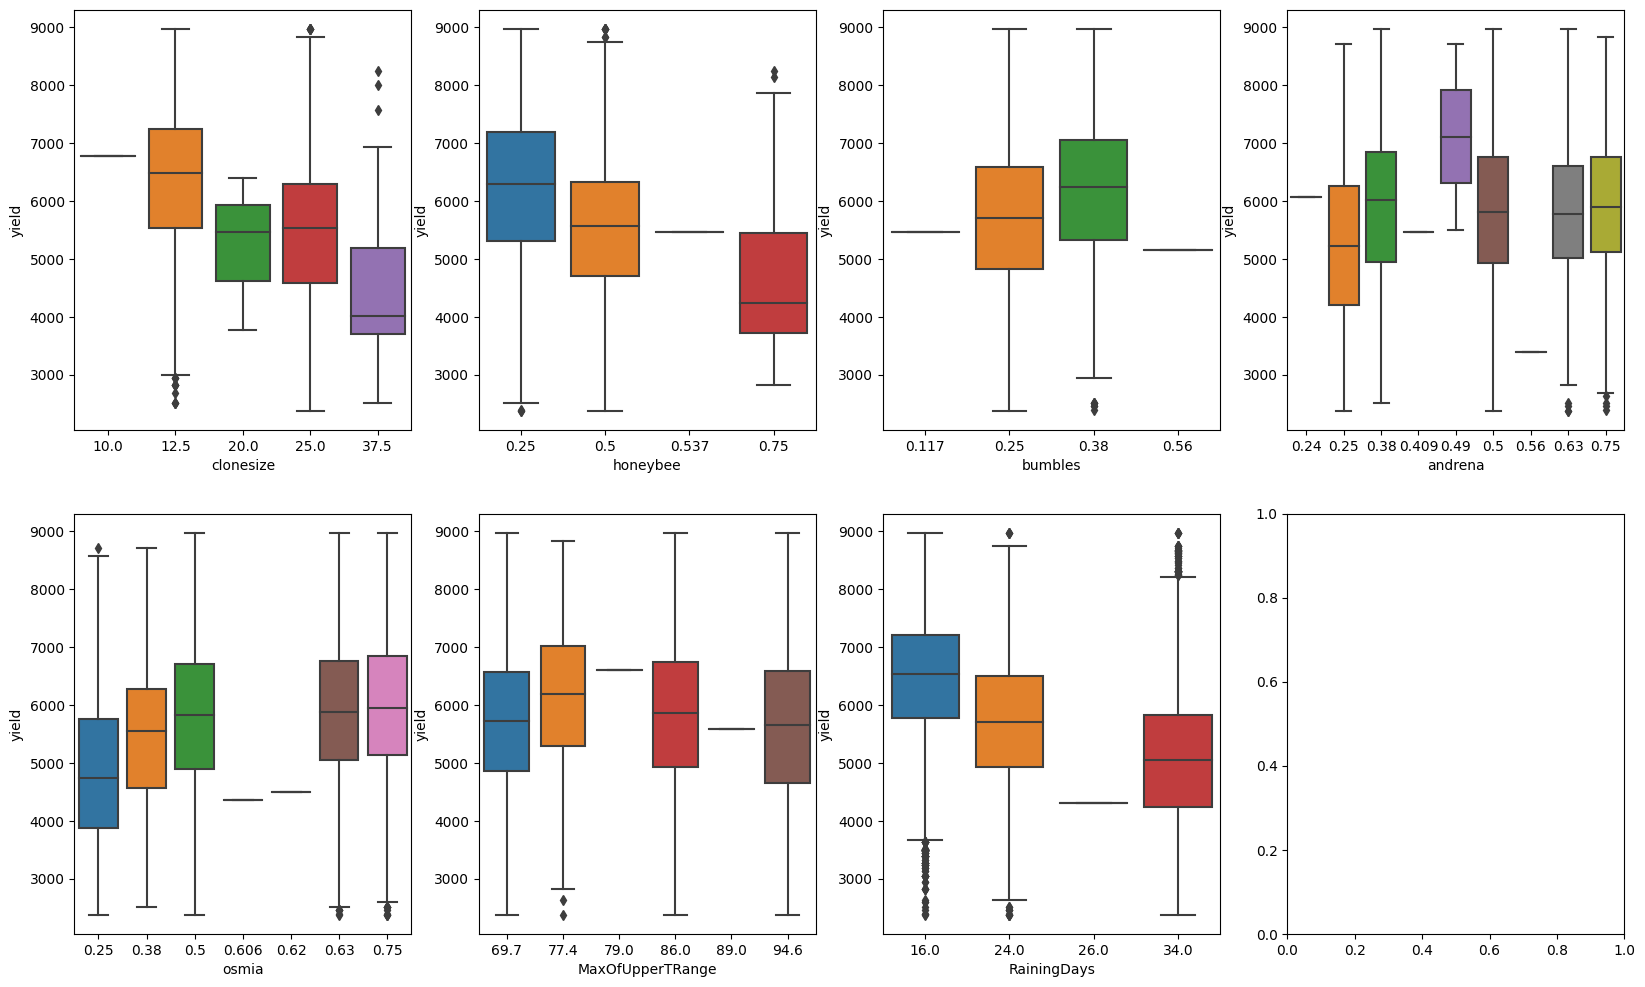

In [168]:
# Plot box plots to see how the distribution of each "category" affects the yield
fig, axs = plt.subplots(2, 4, figsize=(20,12))
for i, col in enumerate(train_df.columns[:-4]):
    sns.boxplot(data=train_df, x=col, y='yield', ax=axs[i // 4, i % 4])

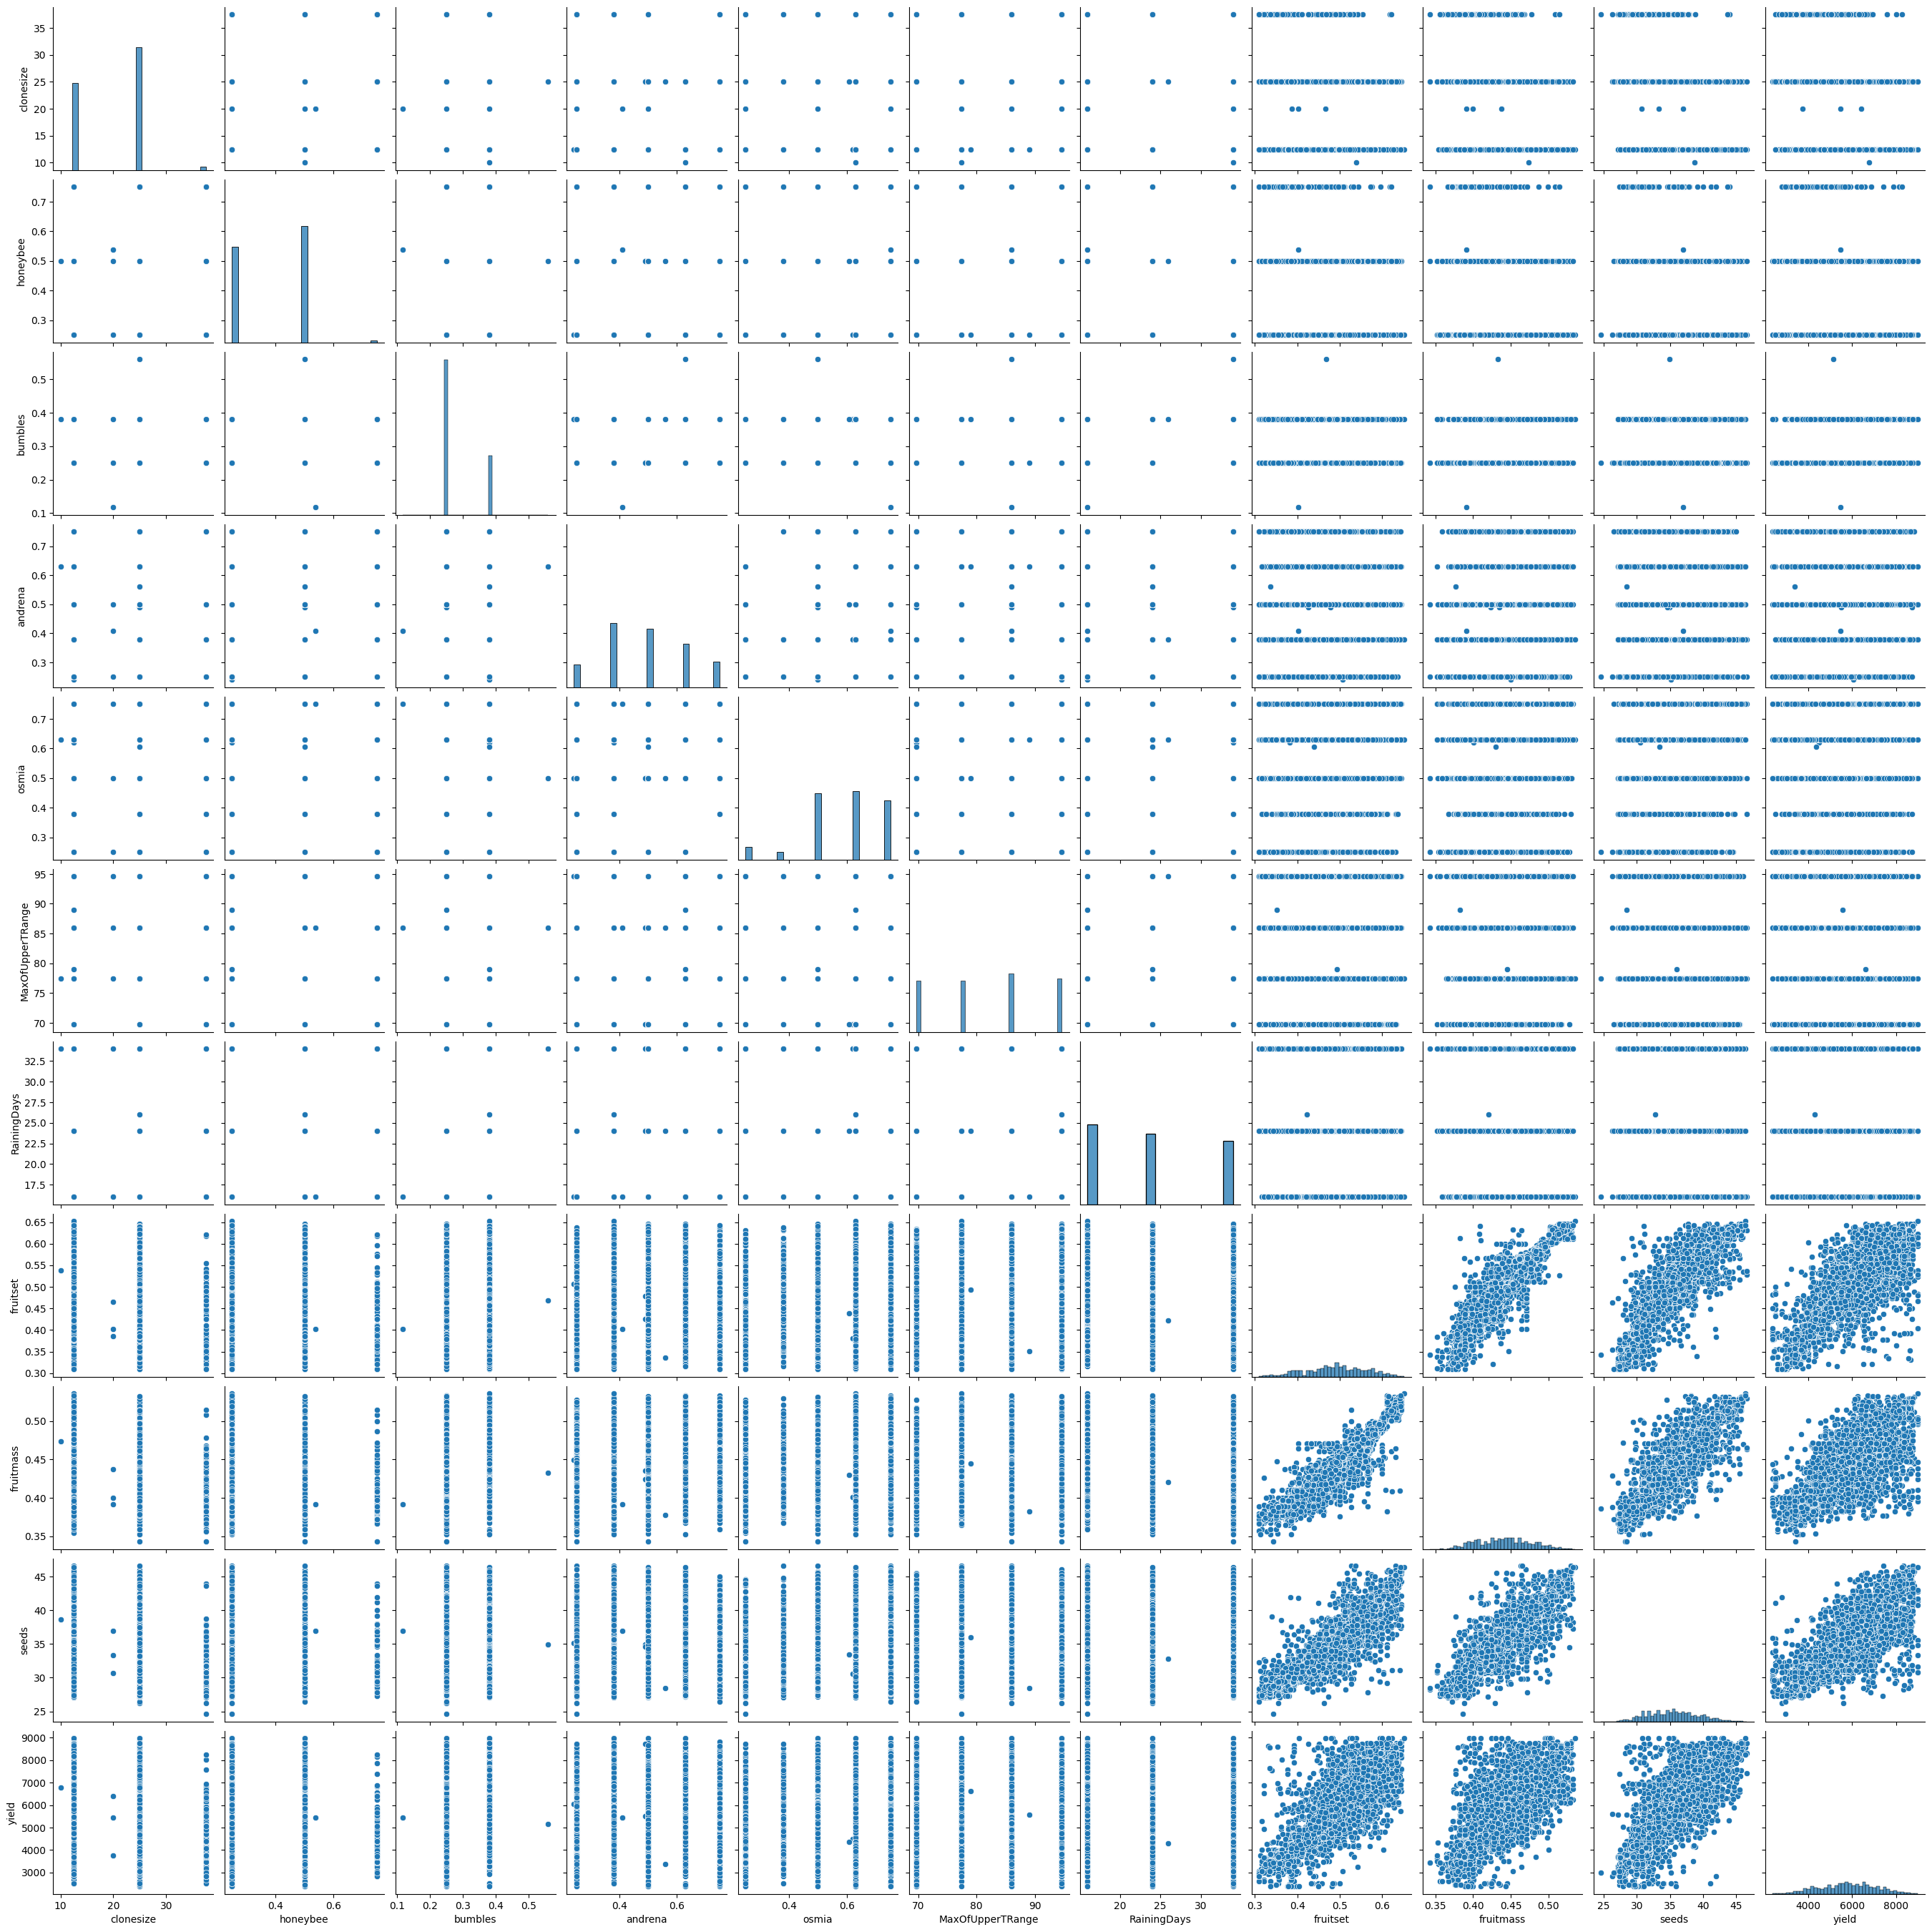

In [162]:
sns.pairplot(train_df)

In [219]:
# OLD CELL
#### Code to select the best features
# from sklearn.feature_selection import SelectKBest, f_regression

# X_train, y_train = train_df.iloc[:,:-1], train_df['yield']
# X_test = test_df

# X_train.shape, y_train.shape, train_df.shape

# selector = SelectKBest(f_regression, k=6)
# X_train_optimal = selector.fit_transform(X_train, y_train)
# X_test_optimal = selector.transform(X_test)

# # Get the selected feature indices
# selected_indices = selector.get_support(indices=True)

# # Get the names of the selected columns
# selected_columns = X_train.columns[selected_indices]
# print(selected_columns)

# X_train_optimal = pd.DataFrame(X_train_optimal, columns=selected_columns)
# X_test_optimal = pd.DataFrame(X_test_optimal, columns=selected_columns)


Index(['clonesize', 'osmia', 'RainingDays', 'fruitset', 'fruitmass', 'seeds'], dtype='object')


In [252]:
test_df['bumbles'].value_counts()

0.250    7266
0.380    2890
0.117      26
0.000       5
0.042       4
0.058       1
0.065       1
0.585       1
Name: bumbles, dtype: int64

## Feature Engineering

In [253]:
# Select the columns to be binned into categories
columns_to_be_binned = train_df_new.columns[:-4]
columns_to_be_binned

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'RainingDays'],
      dtype='object')

In [254]:
test_df.isna().sum()

clonesize           0
honeybee            0
bumbles             0
andrena             0
osmia               0
MaxOfUpperTRange    0
RainingDays         0
fruitset            0
fruitmass           0
seeds               0
dtype: int64

In [255]:
# clonesize binning
bin_edges = [0, 15, 30, 45]
bin_labels = [1, 2, 3]
train_df['clonesize_binned'] = pd.cut(train_df['clonesize'], bins=bin_edges, labels=bin_labels)
test_df['clonesize_binned'] = pd.cut(test_df['clonesize'], bins=bin_edges, labels=bin_labels, right=False)



In [256]:
# honeybee binning
bin_edges = [0, 0.25, 0.5, 10000]
bin_labels = [1, 2, 3]
train_df['honeybee_binned'] = pd.cut(train_df['honeybee'], bins=bin_edges, labels=bin_labels)
test_df['honeybee_binned'] = pd.cut(test_df['honeybee'], bins=bin_edges, labels=bin_labels, right=False)

In [270]:
# bumbles binning
bin_edges = [0, 0.3, 10000]
bin_labels = [1, 2]
train_df['bumbles_binned'] = pd.cut(train_df['bumbles'], bins=bin_edges, labels=bin_labels)
test_df['bumbles_binned'] = pd.cut(test_df['bumbles'], bins=bin_edges, labels=bin_labels, right=False)

In [271]:
# andrena binning
bin_edges = [0, 0.25, 0.5, 10000]
bin_labels = [1, 2, 3]
train_df['andrena_binned'] = pd.cut(train_df['andrena'], bins=bin_edges, labels=bin_labels)
test_df['andrena_binned'] = pd.cut(test_df['andrena'], bins=bin_edges, labels=bin_labels, right=False)

In [272]:
# osmia binning
bin_edges = [0, 0.4, 0.65, 10000]
bin_labels = [1, 2, 3]
train_df['osmia_binned'] = pd.cut(train_df['osmia'], bins=bin_edges, labels=bin_labels)
test_df['osmia_binned'] = pd.cut(test_df['osmia'], bins=bin_edges, labels=bin_labels, right=False)

In [273]:
# MaxOfUpperTRange binning
bin_edges = [0, 70, 80, 90, 120]
bin_labels = [1, 2, 3,4]
train_df['MaxOfUpperTRange_binned'] = pd.cut(train_df['MaxOfUpperTRange'], bins=bin_edges, labels=bin_labels)
test_df['MaxOfUpperTRange_binned'] = pd.cut(test_df['MaxOfUpperTRange'], bins=bin_edges, labels=bin_labels, right=False)

In [274]:
# RainingDays binning
bin_edges = [0, 20, 30, 100]
bin_labels = [1, 2, 3]
train_df['RainingDays_binned'] = pd.cut(train_df['RainingDays'], bins=bin_edges, labels=bin_labels)
test_df['RainingDays_binned'] = pd.cut(test_df['RainingDays'], bins=bin_edges, labels=bin_labels, right=False)

In [277]:
train_df_new = train_df.drop(columns=columns_to_be_binned)
train_df_new

,fruitset,fruitmass,seeds,yield,clonesize_binned,honeybee_binned,bumbles_binned,andrena_binned,osmia_binned,MaxOfUpperTRange_binned,RainingDays_binned
0,0.425011,0.417545,32.460887,4476.81146,2,2,1,3,2,1,2
1,0.444908,0.422051,33.858317,5548.12201,2,2,1,2,2,1,2
2,0.552927,0.470853,38.341781,6869.77760,1,1,1,3,2,3,2
3,0.565976,0.478137,39.467561,6880.77590,1,1,1,3,2,2,2
4,0.579677,0.494165,40.484512,7479.93417,2,2,1,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
15284,0.556302,0.476308,40.546480,7667.83619,1,1,1,2,2,2,1
15285,0.354413,0.388145,29.467434,3680.56025,1,1,1,1,2,3,3
15286,0.422548,0.416786,32.299059,4696.44394,2,2,1,2,3,2,3
15287,0.542170,0.434133,36.674243,6772.93347,2,2,1,3,2,1,2


In [220]:
# # OLD CELL
# # Categorical encoding
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer


# categorical_columns = [col for col in X_train_optimal.columns if X_train_optimal[col].value_counts().count() < 10]
# numerical_columns = [col for col in X_train_optimal.columns if X_train_optimal[col].value_counts().count() >= 10]

# X_train_optimal['RainingDays'] = pd.cut(X_train_optimal['RainingDays'], bins=[0,10,20,30,100], labels=['low', 'medium', 'high', 'very high'])
# X_test_optimal['RainingDays'] = pd.cut(X_test_optimal['RainingDays'], bins=[0,10,20,30,100], labels=['low', 'medium', 'high', 'very high'])
# X_train_optimal['clonesize'] = pd.cut(pd.to_numeric(X_train_optimal['clonesize']), bins=[10,20,30,100], labels=['low', 'medium', 'high'])
# X_test_optimal['clonesize'] = pd.cut(pd.to_numeric(X_test_optimal['clonesize']), bins=[10,20,30,100], labels=['low', 'medium', 'high'])

# print(categorical_columns)



# #X_train_optimal['RainingDays'].value_counts(), X_test_optimal['RainingDays'].value_counts()


['clonesize', 'RainingDays']


In [279]:
# Classify the categorical and numerical columns

categ_cols = train_df_new.columns[-7:]
numeric_cols = train_df_new.columns[:3]

categ_cols, numeric_cols


(Index(['clonesize_binned', 'honeybee_binned', 'bumbles_binned',
        'andrena_binned', 'osmia_binned', 'MaxOfUpperTRange_binned',
        'RainingDays_binned'],
       dtype='object'),
 Index(['fruitset', 'fruitmass', 'seeds'], dtype='object'))

In [280]:
# Perform the necessary columnn transformations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, y_train = train_df_new.drop(columns=['yield']), train_df_new['yield']
X_test = test_df

transformer = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_cols),
    ('categorical', OneHotEncoder(), categ_cols)
])

# Apply the transformations
X_train_t = transformer.fit_transform(X_train)
X_test_t = transformer.transform(X_test)

In [283]:
# Test a base model XGBoost to get an idea of what we're working with
from xgboost import XGBRegressor
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor()
score = cross_val_score(xgb, X_train_t, y_train, scoring = "neg_mean_absolute_error", cv=5)
print(f"The mean absolute error for the base xgboost model is: {score.mean():.1f}")


The mean absolute error for the base xgboost model is: -366.8


In [284]:
# Base submission with XGBRegressor
xgb.fit(X_train_t, y_train)
y_pred = xgb.predict(X_test_t)
y_pred_df = pd.DataFrame(y_pred.T, columns=['yield'])
y_pred_df.insert(0, 'id', [i for i in range(15289, len(X_test_t)+15289)])
y_pred_df.to_csv('data/base_submission.csv', index=False)

## MLFlow Experiments 
- To determine which base model performs the best

In [285]:
import mlflow 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

models = [LinearRegression(), Lasso(), Ridge(), XGBRegressor(), RandomForestRegressor(), 
          CatBoostRegressor(), LGBMRegressor()]
mlflow.set_experiment('compare_models_v2')
for model in models:
    with mlflow.start_run():
        mlflow.log_param("model_name", model.__class__.__name__)
        # Assuming you have a trained scikit-learn model called "model"
        mlflow.sklearn.log_model(model, "model_name")


        # Train and evaluate the model
        scores = cross_val_score(model, X_train_t, y_train, cv=5, scoring='neg_mean_absolute_error')
        mean_score = scores.mean()

        # Log the evaluation metric
        mlflow.log_metric("mean_mae_scores", mean_score)


2023/05/18 14:22:50 INFO mlflow.tracking.fluent: Experiment with name 'compare_models_v2' does not exist. Creating a new experiment.
c:\virtual_envs\mle06_training\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Learning rate set to 0.058195
0:	learn: 1205.6927121	total: 143ms	remaining: 2m 23s
1:	learn: 1155.3023001	total: 147ms	remaining: 1m 13s
2:	learn: 1107.9588999	total: 150ms	remaining: 49.9s
3:	learn: 1064.3621359	total: 153ms	remaining: 38.1s
4:	learn: 1022.9604545	total: 156ms	remaining: 31s
5:	learn: 983.4096965	total: 159ms	remaining: 26.3s
6:	learn: 948.0176495	total: 162ms	remaining: 23s
7:	learn: 915.2437159	total: 165ms	remaining: 20.5s
8:	learn: 885.7922733	total: 168ms	remaining: 18.5s
9:	learn: 858.0490291	total: 171ms	remaining: 16.9s
10:	learn: 831.8093296	total: 174ms	remaining: 15.6s
11:	learn: 807.8672226	total: 177ms	remaining: 14.6s
12:	learn: 784.9397660	total: 180ms	remaining: 13.7s
13:	learn: 764.8008932	total: 183ms	remaining: 12.9s
14:	learn: 746.0756652	total: 187ms	remaining: 12.3s
15:	learn: 728.7893137	total: 190ms	remaining: 11.7s
16:	learn: 713.0648086	total: 193ms	remaining: 11.2s
17:	learn: 698.7099203	total: 197ms	remaining: 10.7s
18:	learn: 685.1691224	

- The above experiment gives LightGBM as the best performing model, so we will focus on that going forward


In [211]:
# Obtain the best model
experiment_name = 'compare_models_one'
experiment = mlflow.get_experiment_by_name(experiment_name)
runs = mlflow.search_runs(experiment_ids=experiment.experiment_id)
sorted_runs = runs.sort_values("metrics.mean_mae_scores", ascending=True)
best_run = sorted_runs.iloc[0]
print(best_run.artifact_uri)
# model_uri = best_run.artifact_uri + "/model"
# loaded_model = mlflow.sklearn.load_model(model_uri)

file:///C:/Users/MikePratt/OneDrive%20-%20Kubrick%20Group/ML%20Practice/Playground%20S3E14/kaggle_playground_s3e14/mlruns/586927160501021295/d220613e5f6d48e29f32ef2e38fb9f8e/artifacts


In [225]:
import lightgbm as lgb
import mlflow
import mlflow.lightgbm
from sklearn.model_selection import cross_val_score
import optuna

mlflow.set_experiment('hp_eight')
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 512),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 10.0),
        'random_state': 42,
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        'max_bin': trial.suggest_int('max_bin', 10, 500)
    }
    
    # Start an MLflow run
    with mlflow.start_run():
        # Log the hyperparameters with MLflow
        for key, value in params.items():
            mlflow.log_param(key, value)
            
        # Perform cross-validation
        model = lgb.LGBMRegressor(**params, n_jobs=-1)
        mae_scores = cross_val_score(model, X_train_t, y_train, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
        
        # Calculate the mean RMSE across all folds
        avg_mae = -mae_scores.mean()
        
        # Log the metric with MLflow
        mlflow.log_metric('mae', avg_mae)
        
        return avg_mae

# Set up the Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the hyperparameters for 15 runs
study.optimize(objective, n_trials=100)

# Access the best hyperparameters and the corresponding metric value
best_params = study.best_params
best_metric = study.best_value


2023/05/18 10:58:06 INFO mlflow.tracking.fluent: Experiment with name 'hp_tuning_seven' does not exist. Creating a new experiment.
[I 2023-05-18 10:58:06,549] A new study created in memory with name: no-name-66957167-f884-47f0-b35c-9cd9b8f198a8
[I 2023-05-18 10:58:07,270] Trial 0 finished with value: 362.8149916516139 and parameters: {'num_leaves': 404, 'learning_rate': 0.045259868429138594, 'feature_fraction': 0.521055006278924, 'bagging_fraction': 0.4716082532309991, 'bagging_freq': 2, 'lambda_l1': 8.697125897472462, 'lambda_l2': 2.485478186968125, 'max_depth': 9, 'min_child_samples': 65, 'max_bin': 298}. Best is trial 0 with value: 362.8149916516139.
[I 2023-05-18 10:58:08,116] Trial 1 finished with value: 891.1439551458365 and parameters: {'num_leaves': 184, 'learning_rate': 0.0035462632389814367, 'feature_fraction': 0.28229889800780744, 'bagging_fraction': 0.9637393370999998, 'bagging_freq': 11, 'lambda_l1': 2.989546094290716, 'lambda_l2': 1.0063940224000834, 'max_depth': 10, 'min